# 1.From Scratch

In [0]:
from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run():
    points = genfromtxt("data.csv", delimiter=",")
    learning_rate = 0.0001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = 1000
    print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print ("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print( "After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))

if __name__ == '__main__':
    run()

OSError: ignored

# 2.Using Tensorflow Library[Describe link](https://www.geeksforgeeks.org/linear-regression-using-tensorflow/)

In [0]:
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt 


In [0]:
# np.random.seed(101) 
# tf.set_random_seed(101) 


In [0]:
# Genrating random linear data 
# There will be 50 data points ranging from 0 to 50 
x = np.linspace(0, 50, 50) 
y = np.linspace(0, 50, 50) 

# Adding noise to the random linear data 
x += np.random.uniform(-4, 4, 50) 
y += np.random.uniform(-4, 4, 50) 

n = len(x) # Number of data points 


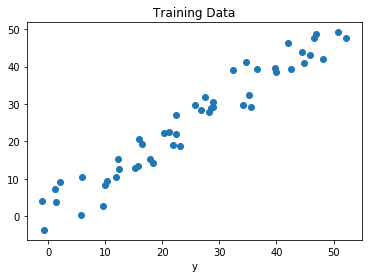

In [25]:
# Plot of Training Data 
plt.scatter(x, y) 
plt.xlabel('x') 
plt.xlabel('y') 
plt.title("Training Data") 
plt.show() 


In [0]:
X = tf.placeholder("float") 
Y = tf.placeholder("float") 


In [0]:
W = tf.Variable(np.random.randn(), name = "W") 
b = tf.Variable(np.random.randn(), name = "b") 


In [0]:
learning_rate = 0.01
training_epochs = 1000


In [0]:
# Hypothesis 
y_pred = tf.add(tf.multiply(X, W), b) 

# Mean Squared Error Cost Function 
cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * n) 

# Gradient Descent Optimizer 
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 

# Global Variables Initializer 
init = tf.global_variables_initializer() 


In [30]:
# Starting the Tensorflow Session 
with tf.Session() as sess: 
	
	# Initializing the Variables 
	sess.run(init) 
	
	# Iterating through all the epochs 
	for epoch in range(training_epochs): 
		
		# Feeding each data point into the optimizer using Feed Dictionary 
		for (_x, _y) in zip(x, y): 
			sess.run(optimizer, feed_dict = {X : _x, Y : _y}) 
		
		# Displaying the result after every 50 epochs 
		if (epoch + 1) % 50 == 0: 
			# Calculating the cost a every epoch 
			c = sess.run(cost, feed_dict = {X : x, Y : y}) 
			print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b)) 
	
	# Storing necessary values to be used outside the Session 
	training_cost = sess.run(cost, feed_dict ={X: x, Y: y}) 
	weight = sess.run(W) 
	bias = sess.run(b) 


Epoch 50 : cost = 7.2280035 W = 0.9440002 b = 0.30088302
Epoch 100 : cost = 7.11203 W = 0.9397843 b = 0.51180565
Epoch 150 : cost = 7.0207543 W = 0.93600404 b = 0.70092833
Epoch 200 : cost = 6.9491205 W = 0.93261456 b = 0.870505
Epoch 250 : cost = 6.8931055 W = 0.9295754 b = 1.0225552
Epoch 300 : cost = 6.8494806 W = 0.9268503 b = 1.1588919
Epoch 350 : cost = 6.8156743 W = 0.9244069 b = 1.281138
Epoch 400 : cost = 6.789628 W = 0.922216 b = 1.3907489
Epoch 450 : cost = 6.7697067 W = 0.9202514 b = 1.489033
Epoch 500 : cost = 6.754602 W = 0.91849 b = 1.5771588
Epoch 550 : cost = 6.7432766 W = 0.9169106 b = 1.6561768
Epoch 600 : cost = 6.7349067 W = 0.91549444 b = 1.7270244
Epoch 650 : cost = 6.7288337 W = 0.91422457 b = 1.7905551
Epoch 700 : cost = 6.7245407 W = 0.91308594 b = 1.8475187
Epoch 750 : cost = 6.7216177 W = 0.91206515 b = 1.8985914
Epoch 800 : cost = 6.719744 W = 0.91114974 b = 1.9443871
Epoch 850 : cost = 6.718659 W = 0.91032904 b = 1.9854493
Epoch 900 : cost = 6.7181706 W = 

In [31]:
# Calculating the predictions 
predictions = weight * x + bias 
print("Training cost =", training_cost, "Weight =", weight, "bias =", bias, '\n') 


Training cost = 6.7183843 Weight = 0.9083413 bias = 2.0848935 



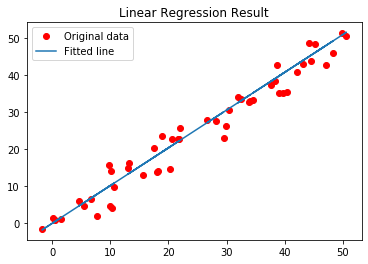

In [22]:
# Plotting the Results 
plt.plot(x, y, 'ro', label ='Original data') 
plt.plot(x, predictions, label ='Fitted line') 
plt.title('Linear Regression Result') 
plt.legend() 
plt.show() 
